# Regressão Bagging and Bossting

In [49]:
#importando as bibliotecas necessarias para realizar a regressão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [50]:
#lendo a base de dados
df = pd.read_csv(r'data\cleaned.csv')

In [73]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.981473,0.937163,-1.245215,-1.030565,-1.198168,-0.174092,-1.099672
1,0.085889,0.937163,-0.638095,-1.030565,-1.240361,-1.360738,1.585529
2,-1.705279,0.937163,0.576145,-1.030565,-1.198168,-3.385019,3.375663
3,0.085889,-1.414272,-0.030975,-1.030565,-1.071587,0.454133,0.242928
4,-1.705279,-2.002131,-1.245215,-1.030565,-1.029394,1.082358,0.242928


In [52]:
#jogando fora as colunas x,y e z pelo fato de serem muito coorelacionadas com o carat, e a primeira coluna que é o index
df = df.drop(['x','y','z', 'carat range'], axis=1)

In [53]:
#lets run standard scaler on the carat, cut, color and clarity columns
df['carat'] = StandardScaler().fit_transform(df[['carat']])
df['cut'] = StandardScaler().fit_transform(df[['cut']])
df['color'] = StandardScaler().fit_transform(df[['color']])
df['clarity'] = StandardScaler().fit_transform(df[['clarity']])

In [54]:
#separando o data frame em x e y
X = df.drop('price', axis=1)
y = df['price']

In [55]:
#separando o dado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
pipeline = Pipeline(steps=[
    ('regressor', BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=42))
])

In [57]:
# Define the grid of hyperparameters
param_grid = {
    'regressor__n_estimators': [10, 50, 100],
    'regressor__max_samples': [0.5, 0.75, 1.0],
    'regressor__max_features': [0.5, 0.75, 1.0],
    'regressor__base_estimator__max_depth': [5, 10, None]
}

In [58]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [59]:
# Fit the model
grid_search.fit(X_train, y_train)

c:\Users\Gabriel Makhoul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('regressor',
                                        BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=42),
                                                         random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__base_estimator__max_depth': [5, 10, None],
                         'regressor__max_features': [0.5, 0.75, 1.0],
                         'regressor__max_samples': [0.5, 0.75, 1.0],
                         'regressor__n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [60]:
# Best parameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Negative MSE: {grid_search.best_score_}")

Best Parameters: {'regressor__base_estimator__max_depth': 10, 'regressor__max_features': 1.0, 'regressor__max_samples': 0.5, 'regressor__n_estimators': 100}
Best Negative MSE: -0.5122699602890841


In [61]:
# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

In [62]:
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

Test MSE: 0.50
Test R²: 0.51


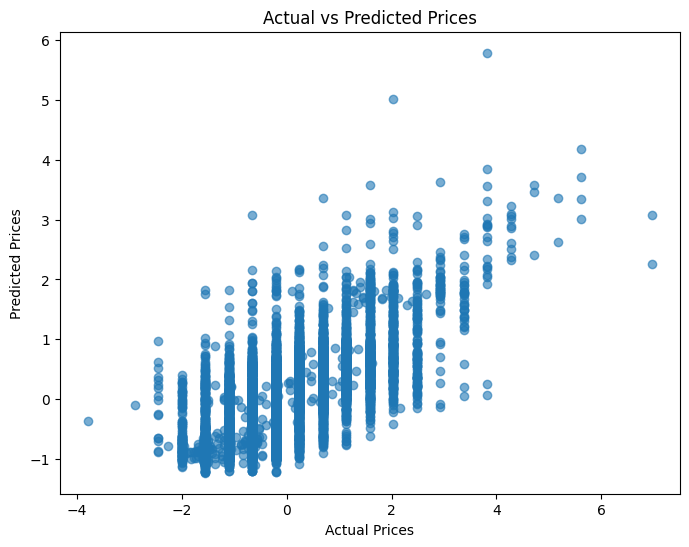

In [63]:
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R²: {test_r2:.2f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [64]:
# Define the pipeline
pipeline = Pipeline(steps=[
    ('regressor', GradientBoostingRegressor(random_state=42))
])

In [65]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.8, 1.0],
    'regressor__min_samples_split': [2, 5, 10]
}

In [66]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [67]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300],
                         'regressor__subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [68]:
# Best parameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Negative MSE: {grid_search.best_score_}")

Best Parameters: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 7, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300, 'regressor__subsample': 0.8}
Best Negative MSE: -0.5115145281260532


In [69]:
# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

In [70]:
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

In [71]:
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R²: {test_r2:.2f}")


Test MSE: 0.50
Test R²: 0.51


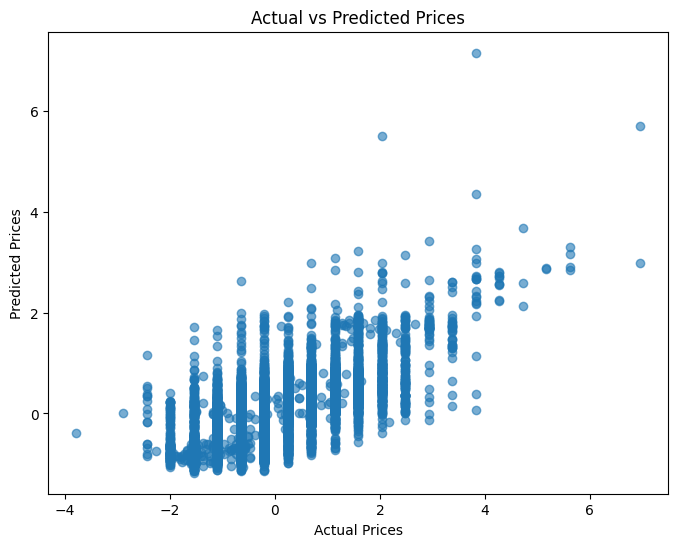

In [72]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()